In [4]:
import numpy as np
import pylab as plt
from ska_ost_low_uv.io import hdf5_to_uvx
from ska_ost_low_uv.postx import ApertureArray
from ska_ost_low_uv.utils import get_test_data

test_data =  {
    'aavs2': (get_test_data('aavs2/correlation_burst_100_20211113_14447_0.hdf5'),
              get_test_data('aavs2/correlation_burst_204_20211113_14653_0.hdf5')),
    'aavs3': (get_test_data('aavs3/correlation_burst_100_20240107_19437_0.hdf5'),
              get_test_data('aavs3/correlation_burst_204_20240107_19437_0.hdf5')),
    'eda2':  (get_test_data('eda2/correlation_burst_100_20211211_14167_0.hdf5'),
              get_test_data('eda2/correlation_burst_204_20211211_14373_0.hdf5')),
}

In [5]:
uvx = hdf5_to_uvx(test_data['aavs2'][0], telescope_name='aavs2')
aa = ApertureArray(uvx)

2024-07-23 02:50:54.166 | INFO     | ska_ost_low_uv.io.to_uvx:load_observation_metadata:40 - Using internal config aavs2
/Users/daniel.price/Data/ska-ost-low-uv/src/ska_ost_low_uv/datamodel/uvx.py:212: FutureWarning: Setting the location attribute post initialization will be disallowed in a future version of Astropy. Instead you should set the location when creating the Time object. In the future, this will raise an AttributeError.
  t.location = eloc
2024-07-23 02:50:54.204 | INFO     | ska_ost_low_uv.datamodel.uvx:create_visibility_array:242 - Conjugating data
2024-07-23 02:50:54.205 | INFO     | ska_ost_low_uv.datamodel.uvx:create_visibility_array:246 - Transposing data
2024-07-23 02:50:54.207 | WARNING  | ska_ost_low_uv.io.to_uvx:hdf5_to_uvx:233 - Could not find expected keys in observation_info
2024-07-23 02:50:54.207 | WARNING  | ska_ost_low_uv.io.to_uvx:hdf5_to_uvx:235 - <KeysViewHDF5 []>


### Module overview

In [6]:
aa.plotting

<Aperture Array module: plotting>
A class for plotting utilties.

    Provides the following functions:
    plot_corr_matrix()
    plot_corr_matrix_4pol()
    plot_antennas()
    plot_uv_dist_amp()

    

In [7]:
aa.coords

<Aperture Array module: coords>
Coordinate utils.

    Provides the following:
        get_sun() - Get the position of the sun as a SkyCoord
        get_zenith() - Get the zenith as a SkyCoord
        get_alt_az() - Get the alt/az of a given SkyCoord
        generate_phase_vector() - Generate a phase vector toward a given SkyCoord

    

In [8]:
aa.calibration

<Aperture Array module: calibration>
ApertureArray Calibration module.

    Provides the following sub-modules:
    holography - self-holography techniques
    stefcal - calibration based on stefcal approach

    

In [9]:
aa.calibration.holography

<Aperture Array module: holography>
A class version of the above jishnu-cal holography routines.

    Provides the following functions:
    set_cal_src() - set the reference source
    run_phasecal() - run jishnu_phasecal
    run_selfholo() - run jishnu_selfholo
    plot_aperture() - plot aperture illumination (run_selfholo must be run first)
    plot_aperture_xy() - plot aperture illumination, 2x2 grid of X and Y mag + phs
    plot_phasecal_iterations() - shows iteration STD plot
    plot_farfield_beam_pattern() - plot cuts through the farfield electric-field pattern (power)

    

In [10]:
aa.calibration.stefcal

<Aperture Array module: stefcal>
A class version of the above simple stefcal routine.

    Provides the following functions:
    set_sky_model() - set point source sky model
    run_stefcal() - run stefcal

    

In [11]:
aa.simulation

<Aperture Array module: simulation>
Simulate visibilities using matvis.

    Provides the following:
        sim_vis_pointsrc(): Simulate visibilities from point source dictionary
        sim_vis_gsm(): Simulate visibilites using pygdsm sky model
        orthview_gsm(): View observed diffuse sky model (Orthographic)
        mollview_gsm(): View observed diffuse sky model (Mollview)
    

In [12]:
aa.imaging

<Aperture Array module: imaging>
ApertureArray Imaging module.

    Provides the following functions:
    make_image()   - Make a 2D all-sky image (orthographic)
    make_healpix() - Make a healpix all-sky image

    

In [13]:
aa.viewer

<Aperture Array module: All Sky Viewer>
An all-sky imager based on matplotlib imshow with WCS support.

    Provides the following:
        orthview() - Plot all-sky image in Orthographic projection
        mollview() - Plot all-sky image using healpy Mollview
        load_labels() - Load dictionary of sky coordinates as labels
        get_pixel() - get pixel ID for a given skycoord
        write_fits() - write to FITS file
        orthview_gsm() - orthview plot observed Global diffuse sky model using pygdsm
        mollview_gsm() - mollview plot observed Global diffuse sky model using pygdsm
    

## aa.plotting

In [14]:
aa.plotting

<Aperture Array module: plotting>
A class for plotting utilties.

    Provides the following functions:
    plot_corr_matrix()
    plot_corr_matrix_4pol()
    plot_antennas()
    plot_uv_dist_amp()

    

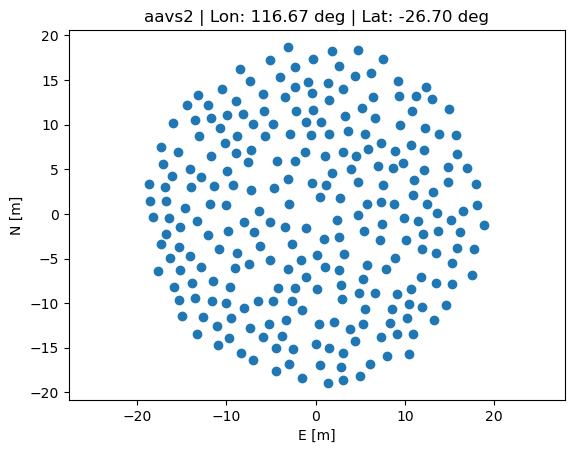

In [15]:
aa.plotting.plot_antennas()

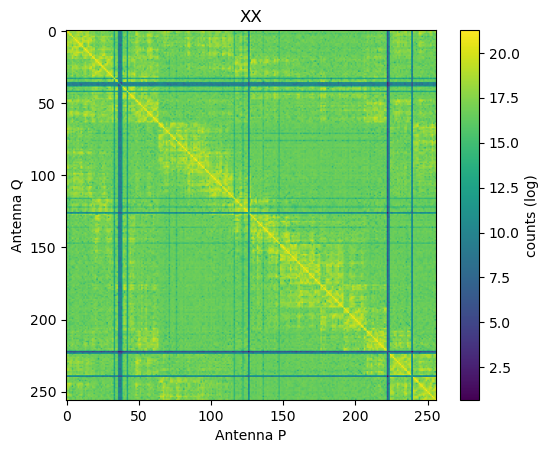

In [16]:
aa.plotting.plot_corr_matrix()

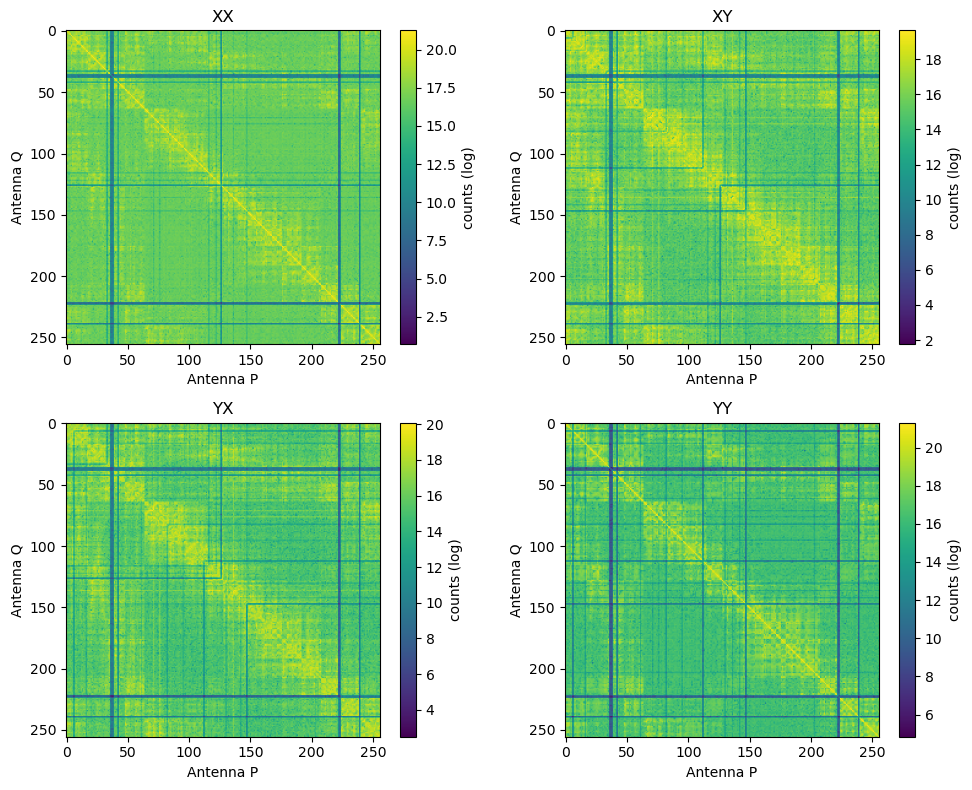

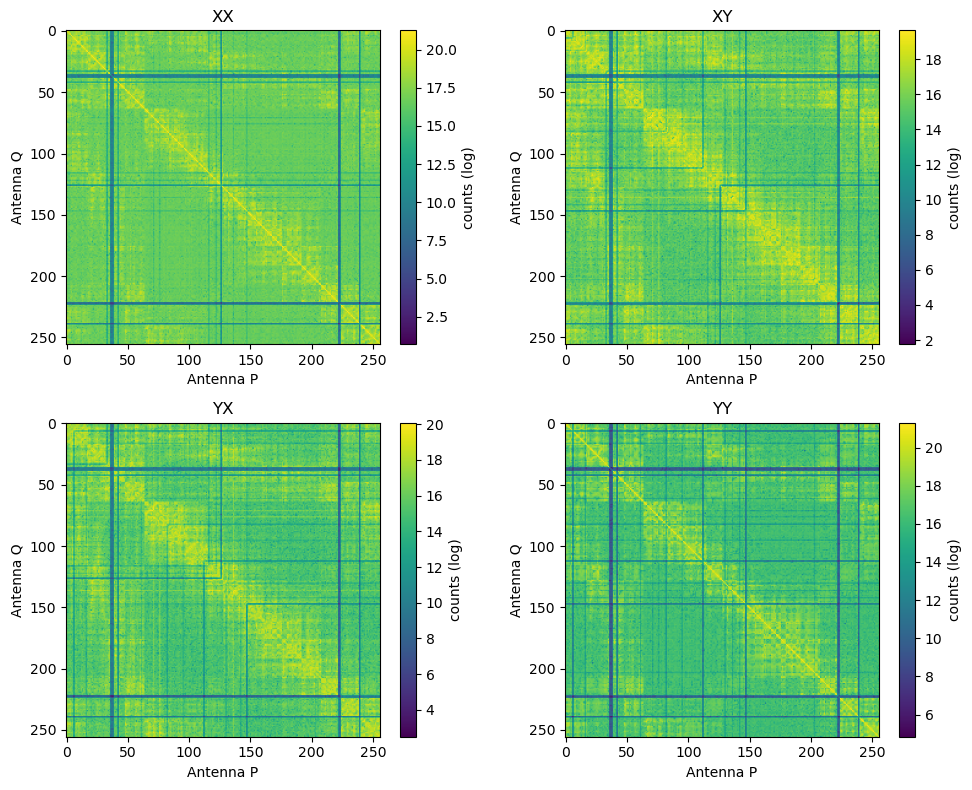

In [17]:
aa.plotting.plot_corr_matrix_4pol()

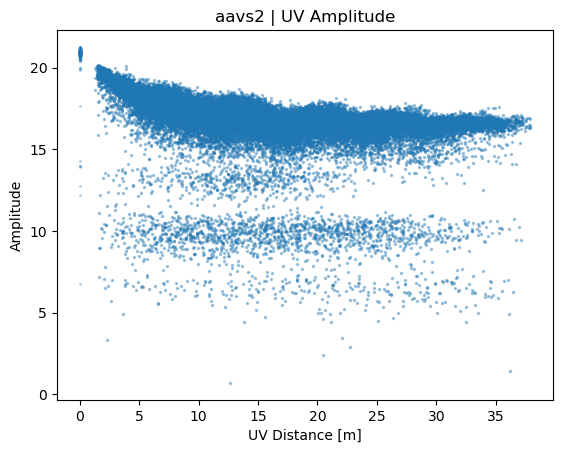

In [18]:
aa.plotting.plot_uvdist_amp(sfunc=np.log)

## aa.coords

In [19]:
aa.coords

<Aperture Array module: coords>
Coordinate utils.

    Provides the following:
        get_sun() - Get the position of the sun as a SkyCoord
        get_zenith() - Get the zenith as a SkyCoord
        get_alt_az() - Get the alt/az of a given SkyCoord
        generate_phase_vector() - Generate a phase vector toward a given SkyCoord

    

In [20]:
aa.coords.get_sun()

<SkyCoord (GCRS: obstime=1636776048.6806436, obsgeoloc=(0., 0., 0.) m, obsgeovel=(0., 0., 0.) m / s): (ra, dec, distance) in (deg, deg, AU)
    (228.25268613, -17.9225986, 0.98962721)>

In [21]:
aa.coords.get_zenith()

<SkyCoord (ICRS): (ra, dec) in deg
    (229.0520918, -26.62561233)>

In [22]:
from astropy.coordinates import SkyCoord
sc = SkyCoord(150, 45, unit=('deg', 'deg'))

aa.coords.get_alt_az(sc)

<SkyCoord (AltAz: obstime=1636776048.6806436, location=(-2559301.90974769, 5095070.36573217, -2848888.27966852) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (314.8186907, -11.34691515)>

In [23]:
# Generates per-antenna phase weights
phs_vec = aa.coords.generate_phase_vector(aa.coords.get_sun())

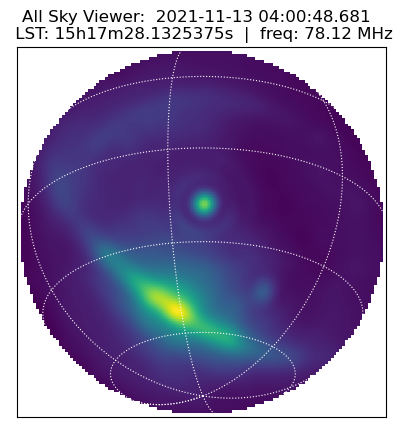

In [24]:
img = aa.imaging.make_image()
aa.viewer.orthview(img)

2024-07-23 02:51:54.600 | WARNING  | ska_ost_low_uv.postx.aperture_array:generate_vis_matrix:217 - Calibration not set, returning raw visibilities.


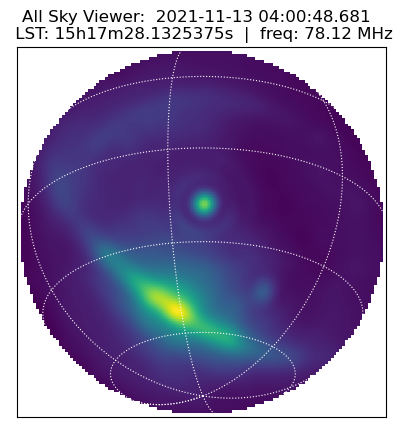

In [29]:
#TODO: FIX
img = aa.imaging.make_image(vis='cal')
aa.viewer.orthview(img)

## aa.calibration

## aa.calibration.holography

In [31]:
aa.calibration.holography

<Aperture Array module: holography>
A class version of the above jishnu-cal holography routines.

    Provides the following functions:
    set_cal_src() - set the reference source
    run_phasecal() - run jishnu_phasecal
    run_selfholo() - run jishnu_selfholo
    plot_aperture() - plot aperture illumination (run_selfholo must be run first)
    plot_aperture_xy() - plot aperture illumination, 2x2 grid of X and Y mag + phs
    plot_phasecal_iterations() - shows iteration STD plot
    plot_farfield_beam_pattern() - plot cuts through the farfield electric-field pattern (power)

    

In [32]:
aa.calibration.holography.set_cal_src(aa.coords.get_sun())

holo_dict = aa.calibration.holography.run_selfholo(vis='data')
print(holo_dict.keys())

2024-07-23 02:52:14.976 | INFO     | ska_ost_low_uv.postx.calibration.holography:jishnu_selfholo:235 - Generating vis matrix: data


dict_keys(['beam_corr', 'aperture_img', 'meas_corr', 'lmn_grid', 'vis_matrix', 'aperture_size', 'n_pix', 'oversample_factor'])


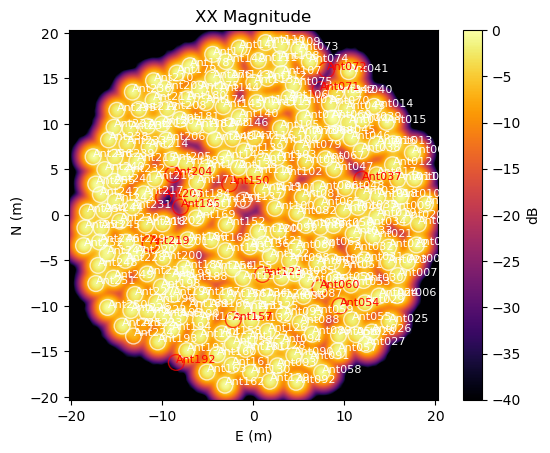

In [33]:
aa.calibration.holography.plot_aperture(plot_type='mag', annotate=True)

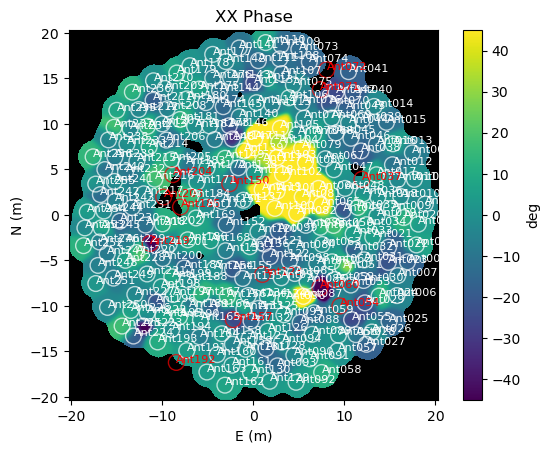

In [34]:
aa.calibration.holography.plot_aperture(plot_type='phs', phs_range=(-45, 45), annotate=True)

In [35]:
cal = aa.calibration.holography.run_phasecal()

#TODO: Fix report_flagged_antennas()
#aa.calibration.holography.report_flagged_antennas()

2024-07-23 02:52:18.016 | INFO     | ska_ost_low_uv.postx.calibration.holography:jishnu_phasecal:330 - Iter 2: Iteration phase std minima reached, breaking


In [36]:
cal

UVXAntennaCal(telescope='aavs2', method='jishnu_phasecal', gains=<xarray.DataArray (frequency: 1, antenna: 256, polarization: 2)>
array([[[ 0.9992217 +3.94461192e-02j,  0.99895597-4.56825793e-02j],
        [ 0.99990565+1.37346284e-02j,  0.9965477 -8.30219910e-02j],
        [ 0.9691075 -2.46638864e-01j,  0.9942203 +1.07358776e-01j],
        [ 0.9973258 +7.30840489e-02j,  0.96608037+2.58241713e-01j],
        [ 0.996956  -7.79659376e-02j,  0.95829177+2.85791844e-01j],
        [ 0.99386346-1.10613823e-01j,  0.99762934+6.88158795e-02j],
        [ 0.99656427+8.28223228e-02j,  0.        +0.00000000e+00j],
        [ 0.97244257+2.33142585e-01j,  0.9972104 -7.46431872e-02j],
        [ 0.9985055 +5.46528287e-02j,  0.9953497 +9.63270739e-02j],
        [ 0.9960569 +8.87160748e-02j,  0.99977636+2.11474858e-02j],
        [ 0.99119437-1.32415295e-01j,  0.9946854 -1.02960326e-01j],
        [ 0.99756837-6.96941465e-02j,  0.99999994+3.20472987e-04j],
        [ 0.9533797 +3.01773340e-01j,  0.9963927 +8.48

2024-07-11 10:01:27.176 | INFO     | aa_uv.postx.calibration.holography:jishnu_selfholo:222 - Generating vis matrix: cal


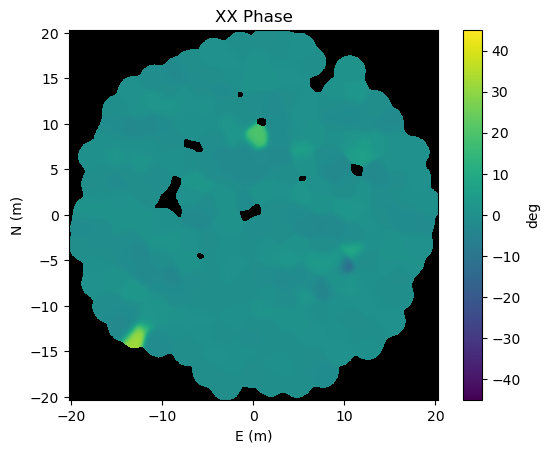

In [34]:
aa.set_cal(cal)
holo_dict = aa.calibration.holography.run_selfholo(vis='cal')
aa.calibration.holography.plot_aperture(plot_type='phs', phs_range=(-45, 45))

In [ ]:
aa.calibration.holography.plot_farfield_beam_pattern()

## aa.imaging and aa.viewer

In [35]:
aa.imaging

<Aperture Array module: imaging>
ApertureArray Imaging module.

    Provides the following functions:
    make_image()   - Make a 2D all-sky image (orthographic)
    make_healpix() - Make a healpix all-sky image

    

In [36]:
aa.viewer

<Aperture Array module: All Sky Viewer>
An all-sky imager based on matplotlib imshow with WCS support.

    Provides the following:
        orthview() - Plot all-sky image in Orthographic projection
        mollview() - Plot all-sky image using healpy Mollview
        load_labels() - Load dictionary of sky coordinates as labels
        get_pixel() - get pixel ID for a given skycoord
        write_fits() - write to FITS file
        orthview_gsm() - orthview plot observed Global diffuse sky model using pygdsm
        mollview_gsm() - mollview plot observed Global diffuse sky model using pygdsm
    

In [37]:
img = aa.imaging.make_image(vis='cal')
hpx = aa.imaging.make_healpix(vis='data')

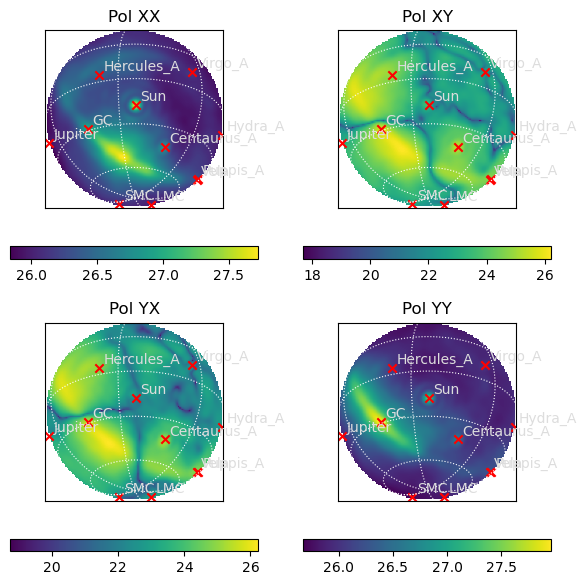

In [38]:
plt.figure(figsize=(3*2,3*2))
for ii in range(4):
    aa.viewer.orthview(img,
                       sfunc=np.log,
                       overlay_srcs=True, colorbar=True, pol_idx=ii,
                       subplot_id=(2,2,ii+1),
                       title=f"Pol {aa.uvx.data.polarization[ii].values}")
plt.tight_layout()

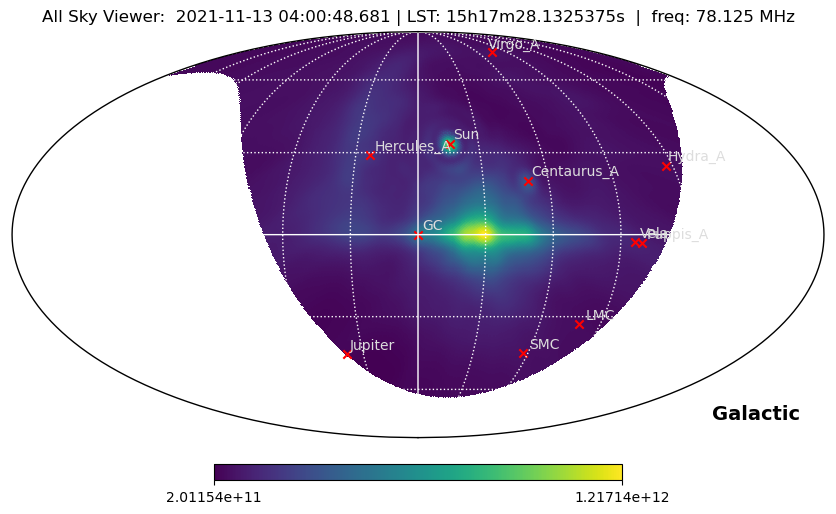

In [39]:
aa.viewer.mollview(hpx, overlay_srcs=True)

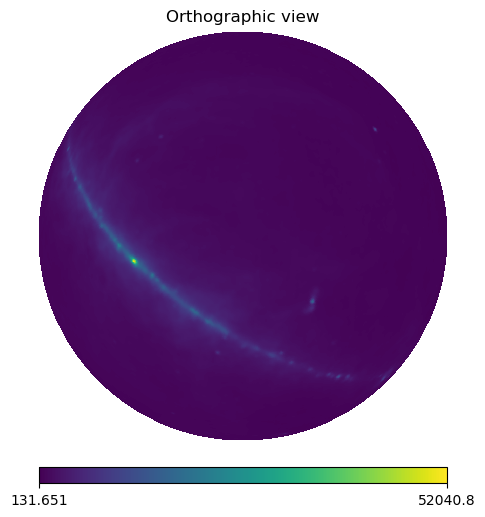

In [40]:
aa.viewer.orthview_gsm()

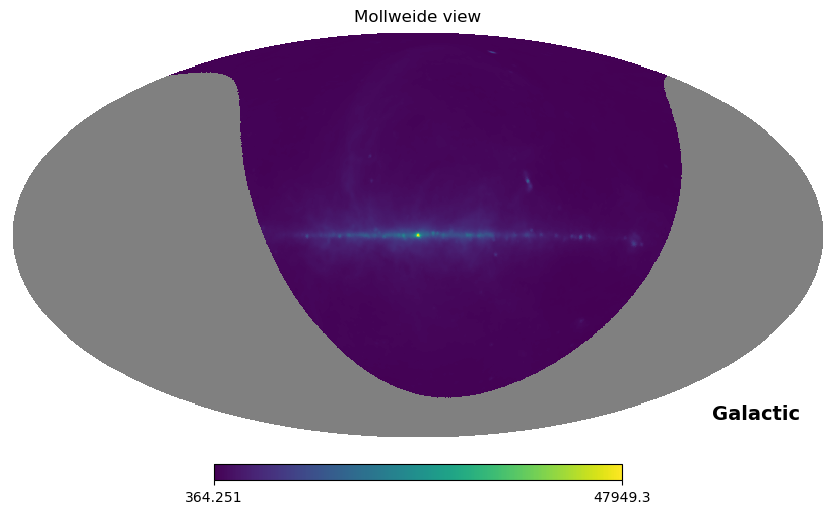

In [41]:
aa.simulation.mollview_gsm()

In [42]:
sc = aa.coords.get_sun()
print(aa.viewer.get_pixel(sc))

NSIDE = 128
print(aa.viewer.get_pixel_healpix(NSIDE, sc))

(74, 65)
19660
